<a href="https://colab.research.google.com/github/YigitBCesur/Pandas-Time-Series/blob/main/Pandas_Time_Series_StockData_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas-Time-Series-StockData_Visualization

a few key points of time series visualizations!

In [1]:
!pip install yfinance

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [60]:
#df = pd.read_csv('../DATA/COST.csv',index_col='Date',parse_dates=True)

today = datetime.date.today()  # Get today's date in YYYY-MM-DD format

ticker = input( 'Enter stock ticker ')   #"AAPL"  #Replace with your desired stock ticker


# Download data with today as the end date
df = yf.download(ticker, start="2010-01-01", end=today)
#df = yf.download(ticker, start="2010-01-01", end="2023-12-31")


Enter stock ticker A


[*********************100%***********************]  1 of 1 completed


In [61]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,A,A,A,A,A,A
Date,,,,,,
2010-01-04 00:00:00+00:00,20.084951,22.389128,22.625179,22.267525,22.453505,3815561
2010-01-05 00:00:00+00:00,19.866774,22.145924,22.331903,22.002861,22.324751,4186031
2010-01-06 00:00:00+00:00,19.796190,22.067240,22.174536,22.002861,22.067240,3243779
2010-01-07 00:00:00+00:00,19.770525,22.038628,22.045780,21.816881,22.017166,3095172
2010-01-08 00:00:00+00:00,19.764107,22.031473,22.067240,21.745352,21.917025,3733918


In [62]:
# To show that dates are already parsed
df.index

DatetimeIndex(['2010-01-04 00:00:00+00:00', '2010-01-05 00:00:00+00:00',
               '2010-01-06 00:00:00+00:00', '2010-01-07 00:00:00+00:00',
               '2010-01-08 00:00:00+00:00', '2010-01-11 00:00:00+00:00',
               '2010-01-12 00:00:00+00:00', '2010-01-13 00:00:00+00:00',
               '2010-01-14 00:00:00+00:00', '2010-01-15 00:00:00+00:00',
               ...
               '2024-10-24 00:00:00+00:00', '2024-10-25 00:00:00+00:00',
               '2024-10-28 00:00:00+00:00', '2024-10-29 00:00:00+00:00',
               '2024-10-30 00:00:00+00:00', '2024-10-31 00:00:00+00:00',
               '2024-11-01 00:00:00+00:00', '2024-11-04 00:00:00+00:00',
               '2024-11-05 00:00:00+00:00', '2024-11-06 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=3737, freq=None)

First we'll create a line plot that puts both <tt>'Close'</tt> and <tt>'Volume'</tt> on the same graph.<br>Remember that we can use <tt>df.plot()</tt> in place of <tt>df.plot.line()</tt>

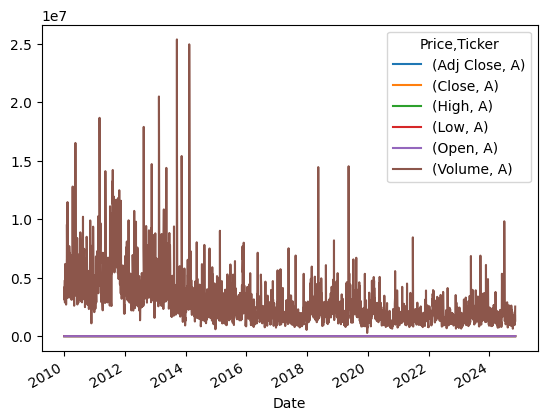

In [63]:
df.plot();

This isn't very helpful due to the difference in y-values, so we'll split them up.

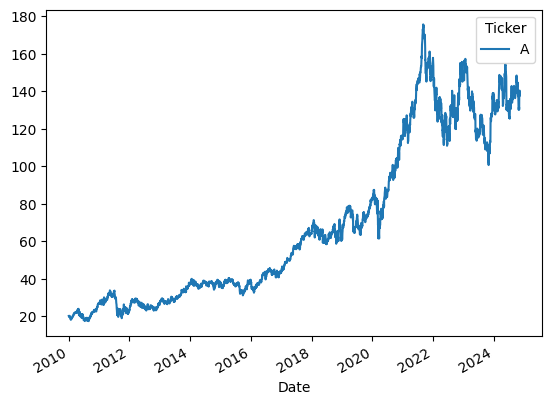

In [64]:
df['Adj Close'].plot();

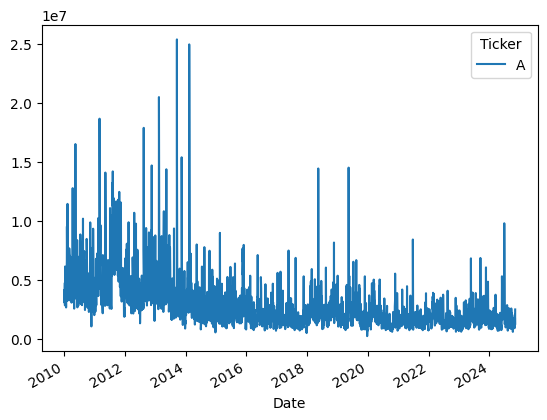

In [66]:
df['Volume'].plot();

# Time Series Plot Formatting

## X Limits
There are two ways we can set a specific span of time as an x-axis limit. We can plot a slice of the dataset, or we can pass x-limit values as an argument into <tt>df.plot()</tt>.

The advantage of using a slice is that pandas automatically adjusts the y-limits accordingly.

The advantage of passing in arguments is that pandas automatically tightens the x-axis. Plus, if we're also setting y-limits this can improve readability.

### Choosing X Limits by Slice:---Zamani dilimleme

<Axes: xlabel='Date'>

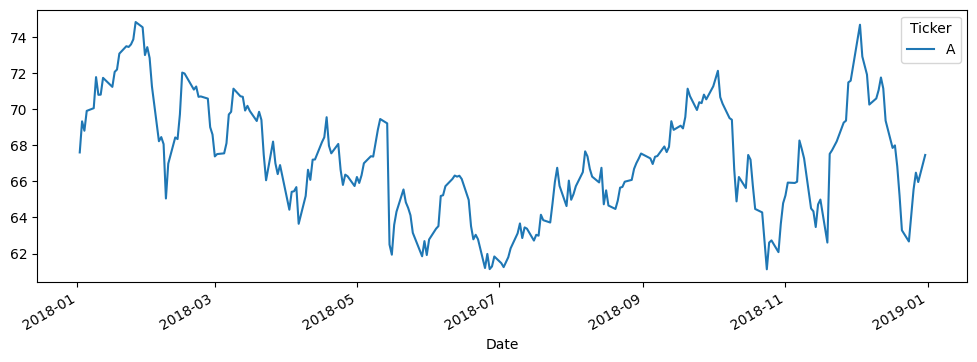

In [67]:
# Dates are separated by a colon:
df['Close']['2018-01-01':'2019-01-01'].plot(figsize=(12,4))

### Choosing X Limits by Argument:

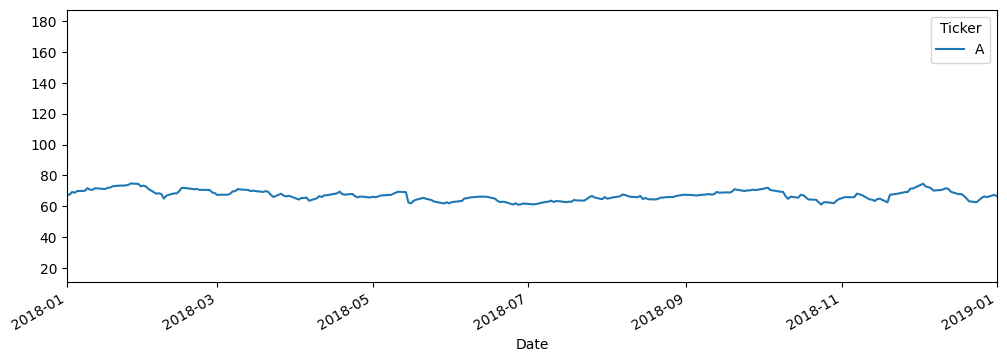

In [68]:
# Why is the y-axis so different?
# Because pandas first plotted the whole thing, then it narrowed
# down the plot, unlike above, where we narrowed the df first!
df['Close'].plot(figsize=(12,4),xlim=['2018-01-01','2019-01-01']);

<div class="alert alert-info"><strong>NOTE:</strong> It's worth noting that the limit values do <em>not</em> have to appear in the index. Pandas will plot the actual dates based on their location in time.<br><br>Also, another advantage of slicing over arguments is that it's easier to include the upper/lower bound as a limit.<br>That is, <tt><font color=black>df['column']['2017-01-01':].plot()</font></tt> is easier to type than <tt><font color=black>df['column'].plot(xlim=('2017-01-01',df.index.max()))</font></tt></div>

Now let's focus on the y-axis limits to get a better sense of the shape of the data.<br>First we'll find out what upper and lower limits to use.

In [69]:
# FIND THE MINIMUM VALUE IN THE RANGE:
df.loc['2018-01-01':'2019-01-01']['Close'].min()

,0
Ticker,
A,61.130001


In [70]:
# FIND THE MAXIMUM VALUE IN THE RANGE:
df.loc['2018-01-01':'2019-01-01']['Close'].max()

,0
Ticker,
A,74.82


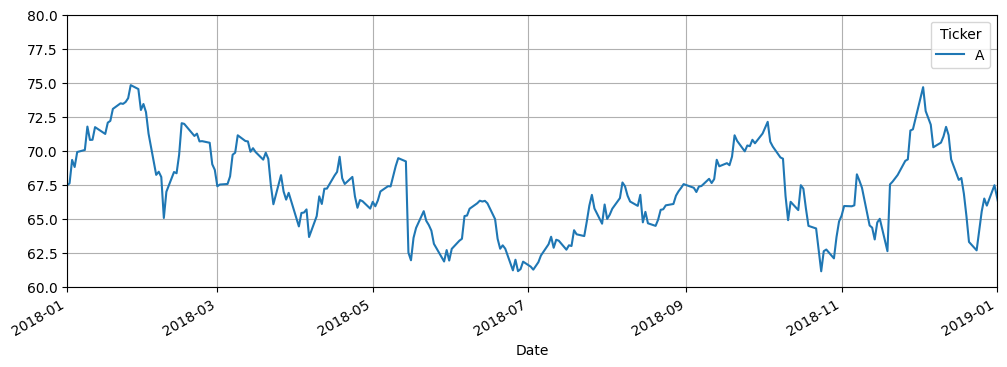

In [89]:
# PLUG THESE IN AS Y-LIMIT VALUES:
df['Close'].plot(figsize=(12,4),xlim=['2018-01-01','2019-01-01'],ylim=[60,80])
plt.grid();

<div class="alert alert-info"><strong>NOTE:</strong> Be careful when setting y-axis limits! Setting too narrow a slice can make graphs appear overly volatile. </div>

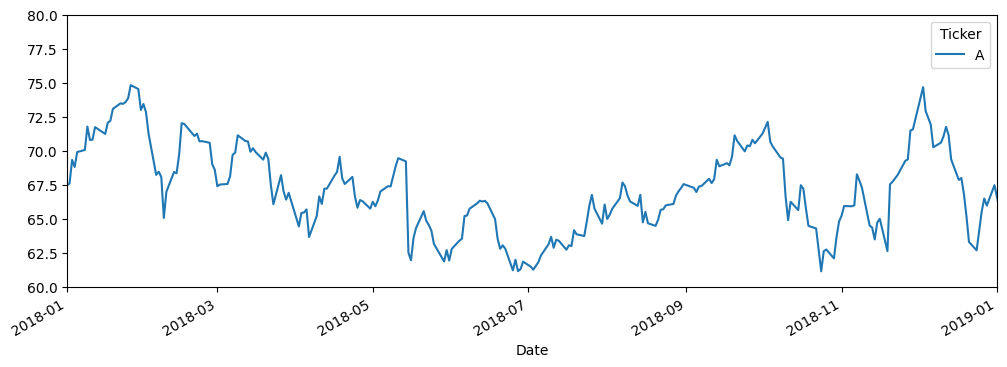

In [90]:
df['Close'].plot(figsize=(12,4),xlim=['2018-01-01','2019-01-01'],ylim=[60,80]);

## X Ticks
In this section we'll look at how to change the format and appearance of dates along the x-axis. To do this, we'll borrow a tool from <tt>matplotlib</tt> called <tt>dates</tt>.

In [91]:
from matplotlib import dates

### Set the spacing
The x-axis values can be divided into major and minor axes. For now, we'll work only with the major axis and learn how to set the spacing with <tt>.set_major_locator()</tt>.

<Axes: xlabel='Date'>

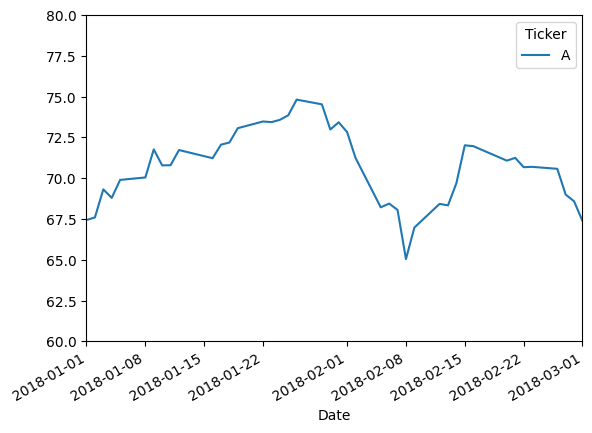

In [92]:
#Notice the strange "jump" in the middle due to the month change!
df['Close'].plot(xlim=['2018-01-01','2018-03-01'],ylim=[60,80])

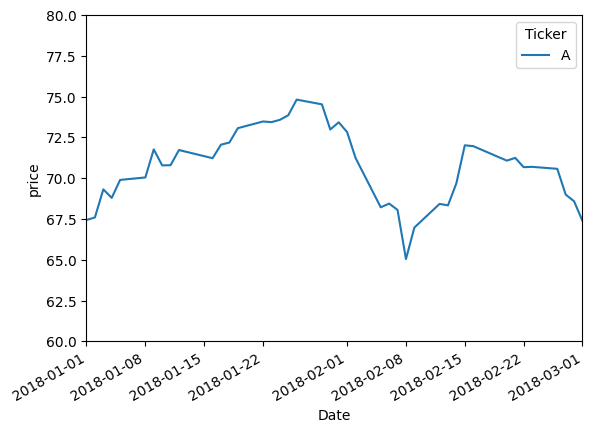

In [93]:
# you can remove "date" index name label
ax = df['Close'].plot(xlim=['2018-01-01','2018-03-01'],ylim=[60,80],
                     xlabel='Date',ylabel='price')

### Using Tick Locator  

In [76]:
from matplotlib import dates

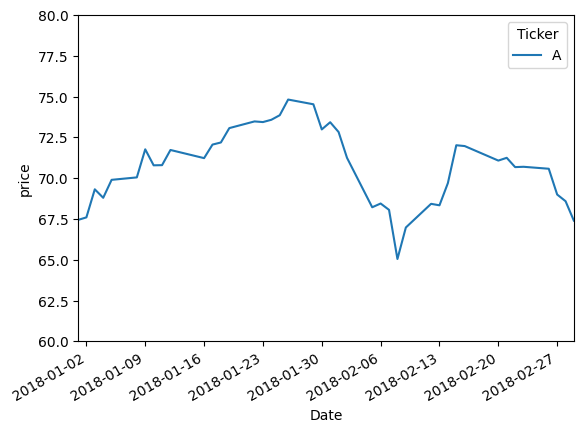

In [94]:
ax = df['Close'].plot(xlim=['2018-01-01','2018-03-01'],ylim=[60,80],
                     xlabel='Date',ylabel='price')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator())

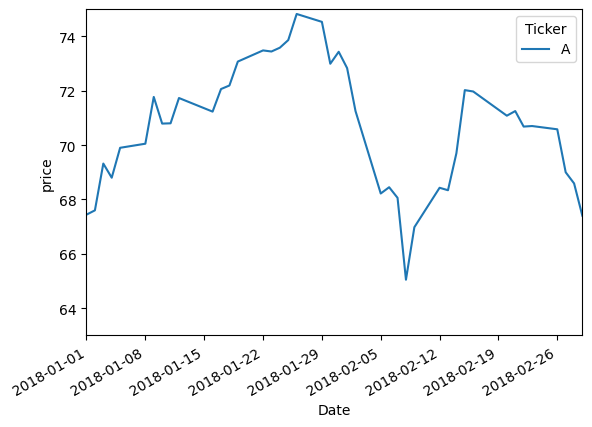

In [97]:
ax = df['Close'].plot(xlim=['2018-01-01','2018-03-01'],ylim=[63,75],
                     xlabel='Date',ylabel='price')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

Notice that dates are spaced one week apart. The dates themselves correspond with <tt>byweekday=0</tt>, or Mondays.<br>
For a full list of locator options available from <tt>matplotlib.dates</tt> visit <a href='https://matplotlib.org/api/dates_api.html#date-tickers'>https://matplotlib.org/api/dates_api.html#date-tickers</a>

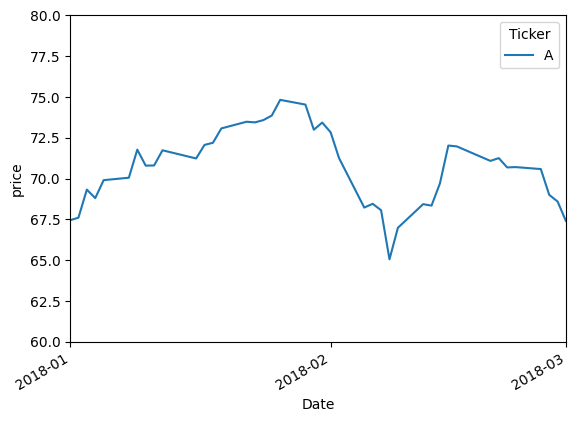

In [98]:
ax = df['Close'].plot(xlim=['2018-01-01','2018-03-01'],ylim=[60,80],
                     xlabel='Date',ylabel='price')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.MonthLocator())

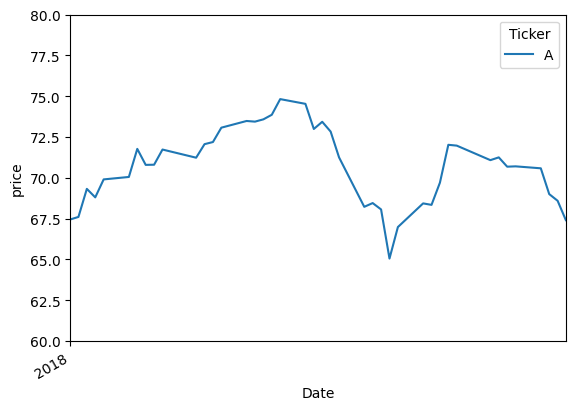

In [99]:
ax = df['Close'].plot(xlim=['2018-01-01','2018-03-01'],ylim=[60,80],
                     xlabel='Date',ylabel='price')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.YearLocator()) # DayLocator()

## Formator

### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [101]:
# USE THIS SPACE TO EXPERIMENT WITH DIFFERENT FORMATS
from datetime import datetime
datetime(2000, 4, 24, 19, 15,9).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Monday, April 24, 2000  07:15:09 PM'

### Combine Locator with Formatter

<Figure size 1000x300 with 0 Axes>

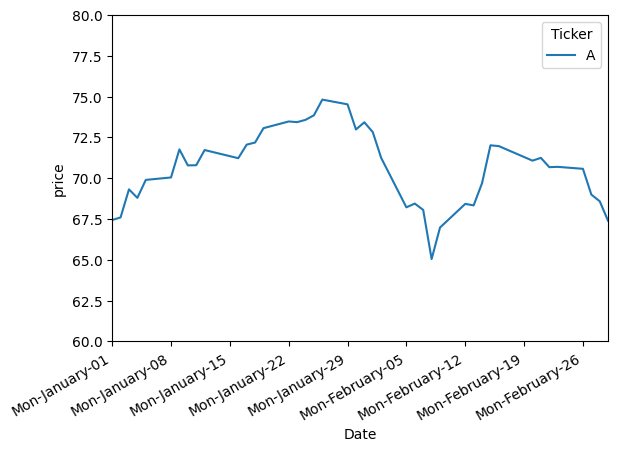

In [103]:
plt.figure(dpi=100,figsize=(10,3))
ax = df['Close'].plot(xlim=['2018-01-01','2018-03-01'],ylim=[60,80],
                     xlabel='Date',ylabel='price')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

# ADD IN THE FORMATTER
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

## Major vs. Minor Axis Values
All of the tick marks we've used so far have belonged to the major axis. We can assign another level called the <em>minor axis</em>, perhaps to separate month names from days of the month.

**DEFAULT PLOT**

<Figure size 1000x300 with 0 Axes>

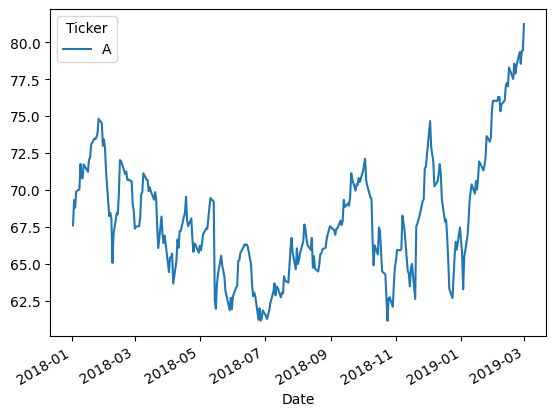

In [104]:
plt.figure(dpi=100,figsize=(10,3))
ax = df['Close']['2018-01-01':'2019-03-01'].plot()

**MAJOR TICK PLOT EDITS**

<Figure size 1000x300 with 0 Axes>

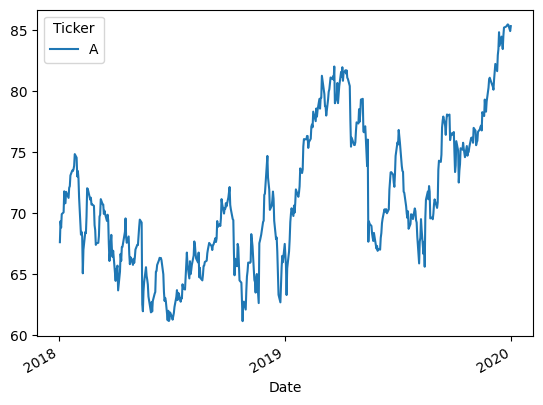

In [105]:
plt.figure(dpi=100,figsize=(10,3))
ax = df['Close']['2018-01-01':'2020-01-01'].plot()

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))

**MAJOR AND MINOR TICK PLOT EDITS**

<Figure size 1000x300 with 0 Axes>

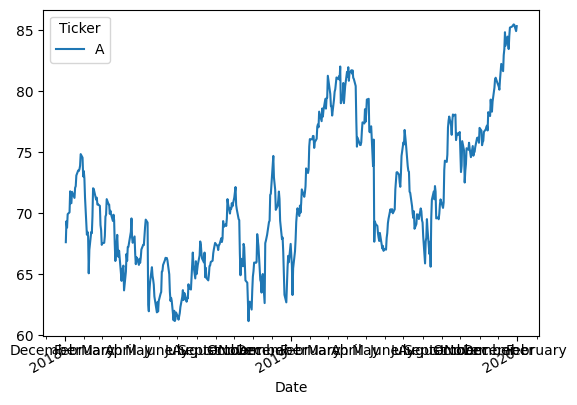

In [106]:
plt.figure(dpi=100,figsize=(10,3))
ax = df['Close']['2018-01-01':'2020-01-01'].plot()

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))

# SET THE TICK LOCATOR AND FORMATTER FOR THE MINOR AXIS
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%B"))


#### Rotate Minor Ticks

<Figure size 1000x300 with 0 Axes>

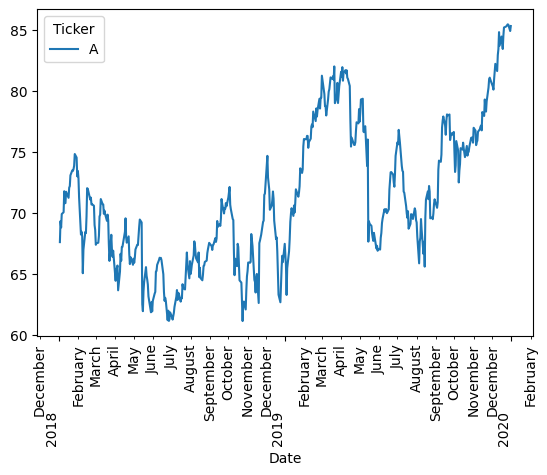

In [107]:
plt.figure(dpi=100,figsize=(10,3))
ax = df['Close']['2018-01-01':'2020-01-01'].plot()

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))

# SET THE TICK LOCATOR AND FORMATTER FOR THE MINOR AXIS
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%B"))


# FURTHER EDITING TICK PROPERTIES

ax.tick_params(axis="x", which="major", rotation=90,pad=50)
ax.tick_params(axis="x", which="minor", rotation=90)

**Include January instead of just Year on Major Tick**

<Figure size 1000x300 with 0 Axes>

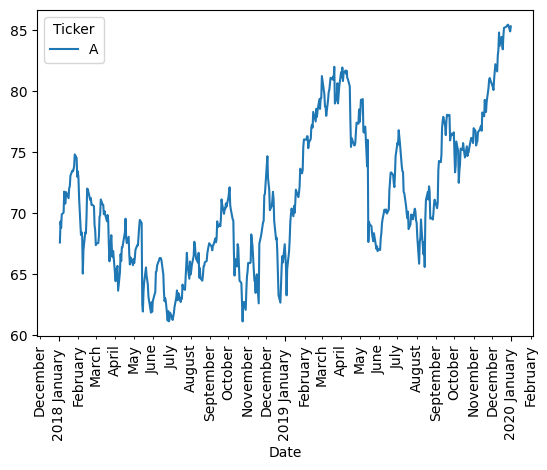

In [108]:
plt.figure(dpi=100,figsize=(10,3))
ax = df['Close']['2018-01-01':'2020-01-01'].plot()

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %B"))

# SET THE TICK LOCATOR AND FORMATTER FOR THE MINOR AXIS
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%B"))


# FURTHER EDITING TICK PROPERTIES

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

# To get it exactly perfect is a lot more work:
# https://stackoverflow.com/questions/28615887/how-to-move-a-ticks-label-in-matplotlib
plt.xticks(ha='center');

## Adding Gridlines
We can add x and y axis gridlines that extend into the plot from each major tick mark.

<Figure size 1000x300 with 0 Axes>

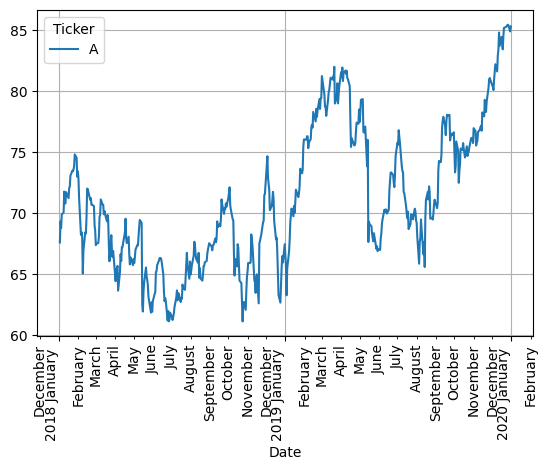

In [109]:
plt.figure(dpi=100,figsize=(10,3))
ax = df['Close']['2018-01-01':'2020-01-01'].plot()

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y %B"))

# SET THE TICK LOCATOR AND FORMATTER FOR THE MINOR AXIS
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("%B"))


# FURTHER EDITING TICK PROPERTIES

ax.tick_params(axis="x", which="major",rotation=90, pad=5)
ax.tick_params(axis="x", which="minor",rotation=90)

ax.yaxis.grid(True)
ax.xaxis.grid(True)